In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, roc_auc_score, roc_curve, auc, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# IMPORT DATA

In [6]:
path = "C:/Users/Kashaf/Downloads/creditcard.csv/creditcard.csv"
df = pd.read_csv(path)

**DISPLAY**

In [7]:
display(df.info(), df.head(5), df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**CHECK CLASS**

In [8]:
print(f"Class value_counts: {df['Class'].value_counts()}")

Class value_counts: 0    284315
1       492
Name: Class, dtype: int64


In [9]:
legit_df = df[df.Class == 0]
fraud_df = df[df.Class == 1]

In [10]:
legit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


**MISSING VALUE**

In [12]:
#print('Missing value')
#total = df.isnull().sum().sort_values(ascending=False)
#percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data[missing_data['Total'] > 0]

**UNDER SAMPLING**

In [13]:
legit_sample = legit_df.sample(n=492)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
210446,137986.0,1.520802,-0.961520,-1.852868,0.314857,0.677925,0.928610,0.226385,0.171685,0.862413,...,-0.036619,-0.374581,0.122257,-0.588332,-0.261797,-0.448775,-0.015005,-0.022289,229.00,0
183563,125855.0,-2.130560,-0.248288,-0.142629,-1.895921,0.109486,0.411702,0.816657,0.252248,-1.362448,...,-0.172810,0.271763,-0.248003,-0.107064,1.252547,0.025014,-0.218653,-0.169705,174.00,0
86156,61109.0,1.098752,-0.183024,0.710915,0.652823,-0.621751,-0.007255,-0.351164,0.228129,0.423678,...,-0.213496,-0.533951,0.124215,0.231794,0.144009,0.287611,-0.019913,0.004283,20.94,0
191289,129196.0,-0.809437,0.253738,1.737600,2.011787,-0.995472,1.001348,1.260044,0.044493,-0.845983,...,0.098751,-0.179281,0.600910,0.972933,0.133846,-0.421951,0.059417,0.137443,320.00,0
14291,25362.0,-1.192547,0.715833,1.556153,0.620500,0.210861,0.048327,0.881362,0.113032,-0.409085,...,-0.088614,-0.114110,-0.342898,0.006336,0.712230,-0.297096,0.192253,0.129074,92.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235081,148242.0,0.405885,1.791103,-3.595409,-0.162664,1.670746,0.277019,-1.268842,-5.470678,-1.036883,...,-2.562587,0.806016,0.086695,-0.395292,0.682785,0.629213,-0.084237,0.178649,0.76,0
217160,140789.0,1.860367,-0.708163,-0.552829,0.088351,0.019909,1.507850,-1.046946,0.584451,1.137358,...,0.245276,0.974081,0.165584,-1.590415,-0.463508,0.682656,0.021836,-0.075293,10.00,0
254968,157003.0,-0.150787,1.181007,-0.902251,-0.581267,0.711060,-0.716848,0.687367,0.194169,-0.092286,...,0.340768,1.128870,-0.208424,-0.968016,-0.632774,-0.154754,0.383218,0.249321,1.99,0
133449,80392.0,-0.889059,-0.783804,1.603748,-1.393822,-0.596512,-0.640551,0.230149,0.061024,-1.165483,...,0.217680,0.227596,0.368121,0.529145,-0.298385,-0.591531,0.070893,0.158608,148.00,0


In [14]:
new_df = pd.concat([legit_sample, fraud_df], axis=0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
210446,137986.0,1.520802,-0.961520,-1.852868,0.314857,0.677925,0.928610,0.226385,0.171685,0.862413,...,-0.036619,-0.374581,0.122257,-0.588332,-0.261797,-0.448775,-0.015005,-0.022289,229.00,0
183563,125855.0,-2.130560,-0.248288,-0.142629,-1.895921,0.109486,0.411702,0.816657,0.252248,-1.362448,...,-0.172810,0.271763,-0.248003,-0.107064,1.252547,0.025014,-0.218653,-0.169705,174.00,0
86156,61109.0,1.098752,-0.183024,0.710915,0.652823,-0.621751,-0.007255,-0.351164,0.228129,0.423678,...,-0.213496,-0.533951,0.124215,0.231794,0.144009,0.287611,-0.019913,0.004283,20.94,0
191289,129196.0,-0.809437,0.253738,1.737600,2.011787,-0.995472,1.001348,1.260044,0.044493,-0.845983,...,0.098751,-0.179281,0.600910,0.972933,0.133846,-0.421951,0.059417,0.137443,320.00,0
14291,25362.0,-1.192547,0.715833,1.556153,0.620500,0.210861,0.048327,0.881362,0.113032,-0.409085,...,-0.088614,-0.114110,-0.342898,0.006336,0.712230,-0.297096,0.192253,0.129074,92.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [15]:
print(f"new_df Class value_counts : {new_df['Class'].value_counts()}")

new_df Class value_counts : 0    492
1    492
Name: Class, dtype: int64


# ANALYSIS

# MODELLING

**train_test_split**

In [16]:
X = new_df.drop(['Class'], axis = 1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**set up model**

Logistic Regression:

Decision Trees: 

Random Forest: 

Gradient Boosting Machines (GBM): 

Support Vector Machines (SVM): 

In [18]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)

model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC.fit(X_train, y_train)

# model_XGB = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
# model_XGB.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# MODEL EVALUATION

**ACCURACY AND ROC_AUC SCORE LOGISTIC REGRESSION**

In [19]:
prediction_test_LR = model_LR.predict(X_test)
prediction_test_LR_roc_auc = model_LR.predict_proba(X_test)

In [20]:
accuracy_LR = accuracy_score(y_test, prediction_test_LR)
roc_auc_LR = roc_auc_score(y_test, prediction_test_LR_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy LOGISTIC REGRESSION: {accuracy_LR * 100:.2f}%')
print(f'ROC AUC Score LOGISTIC REGRESSION: {roc_auc_LR:.2f}')

Accuracy LOGISTIC REGRESSION: 90.86%
ROC AUC Score LOGISTIC REGRESSION: 0.96


**CONFUSION MATRIX AND CLASSIFICATION REPORT LOGISTIC REGRESSION**

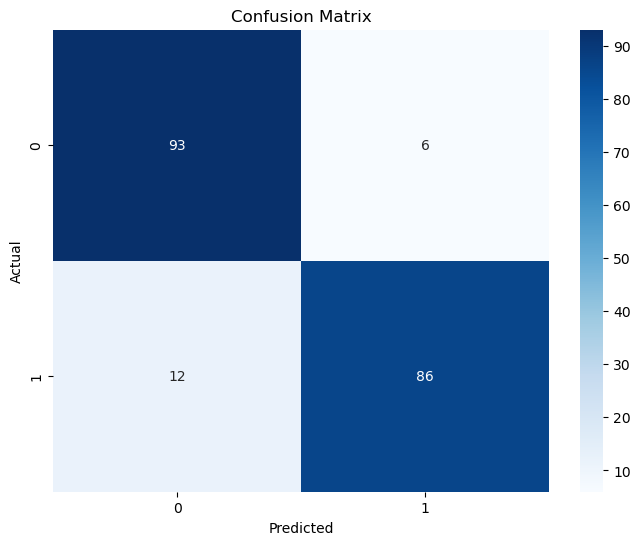

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        99
           1       0.93      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [21]:
# Confusion matrix
conf_matrix_LR = confusion_matrix(y_test, prediction_test_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_LR)
print('Classification Report:')
print(class_report)

**ACCURACY DECISION TREE CLASSIFIER**

In [22]:
prediction_test_DTC = model_DTC.predict(X_test)
prediction_test_DTC_roc_auc = model_DTC.predict_proba(X_test)

In [23]:
accuracy_DTC = accuracy_score(y_test, prediction_test_DTC)
roc_auc_DTC = roc_auc_score(y_test, prediction_test_DTC_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy DECISION TREE CLASSIFIER: {accuracy_DTC * 100:.2f}%')
print(f'ROC AUC Score DECISION TREE CLASSIFIER: {roc_auc_DTC:.2f}')

Accuracy DECISION TREE CLASSIFIER: 88.32%
ROC AUC Score DECISION TREE CLASSIFIER: 0.88


**CONFUSION MATRIX AND CLASSIFICATION REPORT DECISION TREE CLASSIFIER**

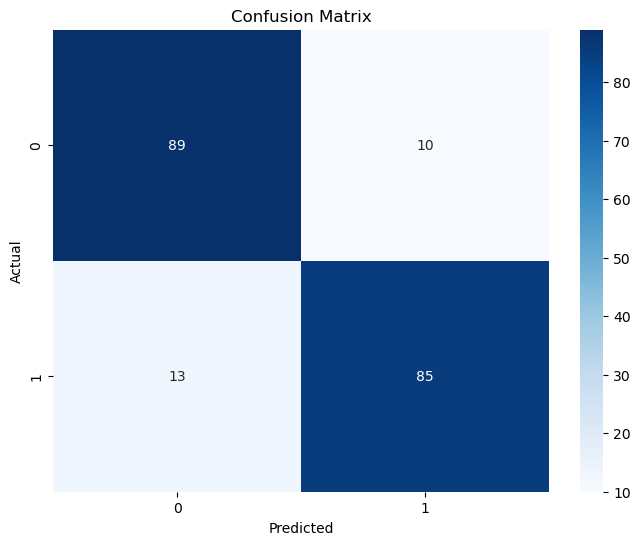

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        99
           1       0.89      0.87      0.88        98

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197



In [24]:
# Confusion matrix
conf_matrix_DTC = confusion_matrix(y_test, prediction_test_DTC)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_DTC, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_DTC)
print('Classification Report:')
print(class_report)

**ACCURACY RANDOM FOREST CLASSIFIER**

In [25]:
prediction_test_RFC = model_RFC.predict(X_test)
prediction_test_RFC_roc_auc = model_RFC.predict_proba(X_test)

In [26]:
accuracy_RFC = accuracy_score(y_test, prediction_test_RFC)
roc_auc_RFC = roc_auc_score(y_test, prediction_test_RFC_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy RANDOM FOREST CLASSIFIER: {accuracy_RFC * 100:.2f}%')
print(f'ROC AUC Score RANDOM FOREST CLASSIFIER: {roc_auc_RFC:.2f}')

Accuracy RANDOM FOREST CLASSIFIER: 93.91%
ROC AUC Score RANDOM FOREST CLASSIFIER: 0.98


**CONFUSION MATRIX AND CLASSIFICATION REPORT RANDOM FOREST CLASSIFIER**

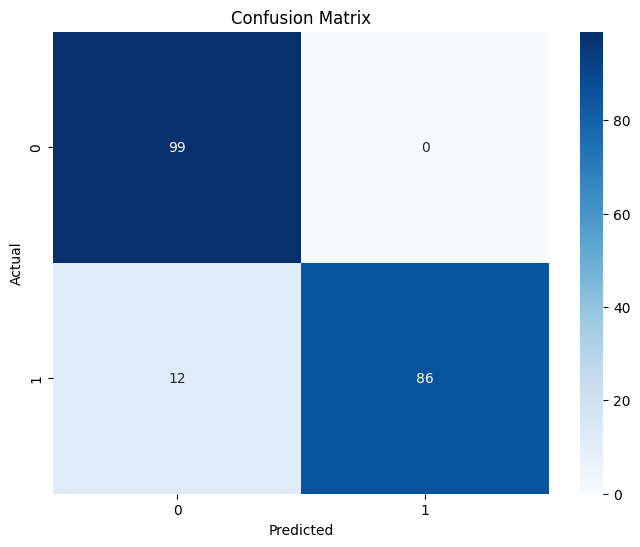

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        99
           1       1.00      0.88      0.93        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [44]:
# Confusion matrix
conf_matrix_RFC = confusion_matrix(y_test, prediction_test_RFC)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RFC, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_RFC)
print('Classification Report:')
print(class_report)

**ACCURACY XGBClassifier**

In [45]:
prediction_test_XGB = model_XGB.predict(X_test)
prediction_test_XGB_roc_auc = model_XGB.predict_proba(X_test)

In [46]:
accuracy_XGB = accuracy_score(y_test, prediction_test_XGB)
roc_auc_XGB = roc_auc_score(y_test, prediction_test_XGB_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy XGBClassifier: {accuracy_XGB * 100:.2f}%')
print(f'ROC AUC Score XGBClassifier: {roc_auc_XGB:.2f}')

Accuracy XGBClassifier: 93.91%
ROC AUC Score XGBClassifier: 0.98


**CONFUSION MATRIX AND CLASSIFICATION REPORT XGBClassifier**

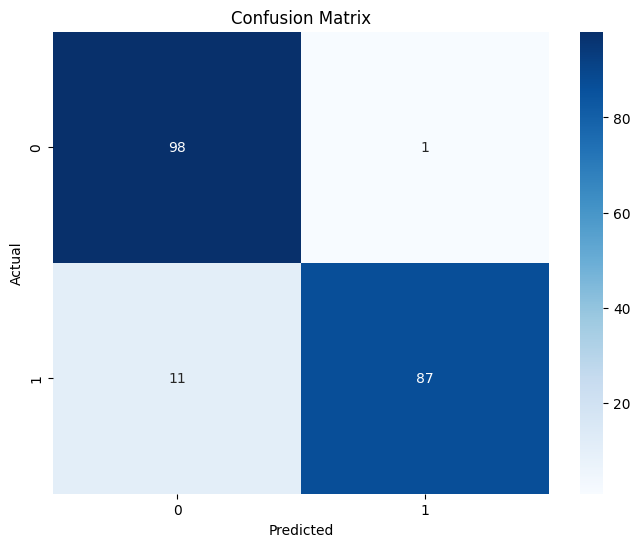

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        99
           1       0.99      0.89      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [47]:
# Confusion matrix
conf_matrix_XGB = confusion_matrix(y_test, prediction_test_XGB)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_XGB)
print('Classification Report:')
print(class_report)

# CONCLUSION

to be continue...